In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import boto3
from IPython.display import Audio
from scipy.io import wavfile
from pydub import AudioSegment
import soundfile as sf
from io import BytesIO
from pyAudioAnalysis import audioBasicIO, ShortTermFeatures, MidTermFeatures
import audiosegment

import librosa
import librosa.display

import os

In [2]:
s3_connection = boto3.resource('s3')
s3_client = boto3.client('s3')

In [3]:
bucket_name = 'jarednewstudy'

In [4]:
#using soundfile module
folder = 'audio_train/'
file_name = '6a1f682a.wav'
path = folder + file_name

response = s3_client.get_object(Bucket=bucket_name,
                                 Key=path,
                                )

data = BytesIO(response['Body'].read())
sound, samplerate = sf.read(data)
Audio(data=sound, rate=samplerate)

In [5]:
# using AudioSegment module
response = s3_client.get_object(Bucket=bucket_name,
                                 Key=path,
                                )
data = BytesIO(response['Body'].read())
seg = AudioSegment.from_wav(data)

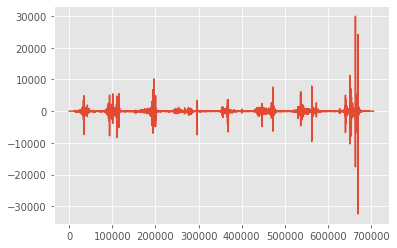

In [6]:
sample_array = seg.get_array_of_samples()
fig, ax = plt.subplots()

plt.plot(sample_array)

In [7]:
# using audiosegment module (wrapper for AudioSegment)

In [8]:
obj = s3_connection.Object(bucket_name, key=path)
result = obj.get()['Body'].read()
wrapper = BytesIO(result)
wav_ = wavfile.read(wrapper)
seg = audiosegment.from_numpy_array(wav_[1], wav_[0])

Text(0, 0.5, 'Frequency in Hz')

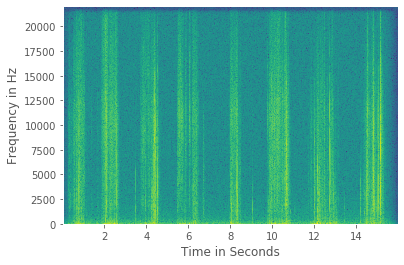

In [9]:
#...
freqs, times, amplitudes = seg.spectrogram(window_length_s=0.03, overlap=0.5)
amplitudes = 10 * np.log10(amplitudes + 1e-9)

# Plot
plt.pcolormesh(times, freqs, amplitudes)
plt.xlabel("Time in Seconds")
plt.ylabel("Frequency in Hz")



Text(0, 0.5, 'energy')

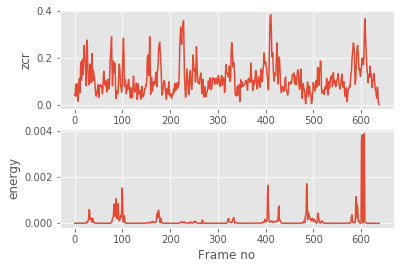

In [10]:
#short term feature extraction example

obj = s3_connection.Object(bucket_name, key=path)
result = obj.get()['Body'].read()
wrapper = BytesIO(result)
wav_ = wavfile.read(wrapper)


Fs, x = wav_[0], wav_[1]
F, f_names = ShortTermFeatures.feature_extraction(x, Fs, 0.050*Fs, 0.025*Fs)
plt.subplot(2,1,1); plt.plot(F[0,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[0]) 
plt.subplot(2,1,2); plt.plot(F[1,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[1])

In [11]:
print(f_names)

['zcr', 'energy', 'energy_entropy', 'spectral_centroid', 'spectral_spread', 'spectral_entropy', 'spectral_flux', 'spectral_rolloff', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12', 'mfcc_13', 'chroma_1', 'chroma_2', 'chroma_3', 'chroma_4', 'chroma_5', 'chroma_6', 'chroma_7', 'chroma_8', 'chroma_9', 'chroma_10', 'chroma_11', 'chroma_12', 'chroma_std', 'delta zcr', 'delta energy', 'delta energy_entropy', 'delta spectral_centroid', 'delta spectral_spread', 'delta spectral_entropy', 'delta spectral_flux', 'delta spectral_rolloff', 'delta mfcc_1', 'delta mfcc_2', 'delta mfcc_3', 'delta mfcc_4', 'delta mfcc_5', 'delta mfcc_6', 'delta mfcc_7', 'delta mfcc_8', 'delta mfcc_9', 'delta mfcc_10', 'delta mfcc_11', 'delta mfcc_12', 'delta mfcc_13', 'delta chroma_1', 'delta chroma_2', 'delta chroma_3', 'delta chroma_4', 'delta chroma_5', 'delta chroma_6', 'delta chroma_7', 'delta chroma_8', 'delta chroma_9', 'delta chroma_10',

Text(0, 0.5, 'energy_mean')

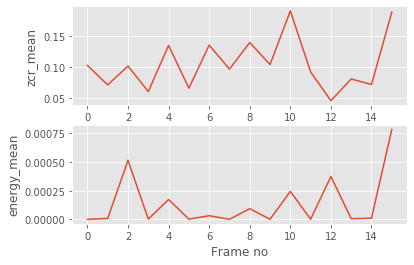

In [12]:
# MidTerm feature extraction example

obj = s3_connection.Object(bucket_name, key=path)
result = obj.get()['Body'].read()
wrapper = BytesIO(result)
wav_ = wavfile.read(wrapper)


Fs, x = wav_[0], wav_[1]
Mid_F, Short_F, mid_f_names = MidTermFeatures.mid_feature_extraction(signal=x,
                                                    sampling_rate=Fs, 
                                                    mid_window=0.5*Fs,
                                                    mid_step =Fs,
                                                    short_window = 0.050*Fs,
                                                    short_step = 0.025*Fs)
plt.subplot(2,1,1); plt.plot(Mid_F[0,:]); plt.xlabel('Frame no'); plt.ylabel(mid_f_names[0]) 
plt.subplot(2,1,2); plt.plot(Mid_F[1,:]); plt.xlabel('Frame no'); plt.ylabel(mid_f_names[1])


In [13]:
print(Mid_F)

[[1.03085299e-01 7.16197822e-02 1.02132486e-01 ... 8.11932849e-02
  7.22323049e-02 1.89110708e-01]
 [1.34936459e-06 8.46247093e-06 5.14937769e-04 ... 6.80571596e-06
  1.07695978e-05 7.83304933e-04]
 [2.86960318e+00 2.92535648e+00 2.72868707e+00 ... 2.74806708e+00
  2.81172940e+00 2.59975550e+00]
 ...
 [3.55884602e-02 3.20031793e-02 2.03151495e-02 ... 3.44371957e-02
  1.86855490e-02 2.63219073e-02]
 [6.83324532e-04 6.46347692e-04 5.46531808e-04 ... 2.30615041e-03
  1.07417672e-03 9.96458504e-04]
 [1.78212694e-02 2.76454492e-02 2.43232244e-02 ... 2.27474729e-02
  1.75553012e-02 8.76360573e-03]]


In [14]:
print(mid_f_names)

['zcr_mean', 'energy_mean', 'energy_entropy_mean', 'spectral_centroid_mean', 'spectral_spread_mean', 'spectral_entropy_mean', 'spectral_flux_mean', 'spectral_rolloff_mean', 'mfcc_1_mean', 'mfcc_2_mean', 'mfcc_3_mean', 'mfcc_4_mean', 'mfcc_5_mean', 'mfcc_6_mean', 'mfcc_7_mean', 'mfcc_8_mean', 'mfcc_9_mean', 'mfcc_10_mean', 'mfcc_11_mean', 'mfcc_12_mean', 'mfcc_13_mean', 'chroma_1_mean', 'chroma_2_mean', 'chroma_3_mean', 'chroma_4_mean', 'chroma_5_mean', 'chroma_6_mean', 'chroma_7_mean', 'chroma_8_mean', 'chroma_9_mean', 'chroma_10_mean', 'chroma_11_mean', 'chroma_12_mean', 'chroma_std_mean', 'delta zcr_mean', 'delta energy_mean', 'delta energy_entropy_mean', 'delta spectral_centroid_mean', 'delta spectral_spread_mean', 'delta spectral_entropy_mean', 'delta spectral_flux_mean', 'delta spectral_rolloff_mean', 'delta mfcc_1_mean', 'delta mfcc_2_mean', 'delta mfcc_3_mean', 'delta mfcc_4_mean', 'delta mfcc_5_mean', 'delta mfcc_6_mean', 'delta mfcc_7_mean', 'delta mfcc_8_mean', 'delta mfcc_9_

In [15]:
individual_df = pd.DataFrame(columns = mid_f_names, data = Mid_F.T)
individual_df.head()

,zcr_mean,energy_mean,energy_entropy_mean,spectral_centroid_mean,spectral_spread_mean,spectral_entropy_mean,spectral_flux_mean,spectral_rolloff_mean,mfcc_1_mean,mfcc_2_mean,...,delta chroma_4_std,delta chroma_5_std,delta chroma_6_std,delta chroma_7_std,delta chroma_8_std,delta chroma_9_std,delta chroma_10_std,delta chroma_11_std,delta chroma_12_std,delta chroma_std_std
0,0.103085,0.000001,2.869603,0.272477,0.274245,0.789995,0.004994,0.123911,-39.954295,1.497277,...,0.003674,0.045178,0.001152,0.103970,0.000285,0.000531,0.004874,0.035588,0.000683,0.017821
1,0.071620,0.000008,2.925356,0.257817,0.287874,0.362461,0.004179,0.040880,-36.913220,2.177397,...,0.004251,0.045136,0.001301,0.134642,0.000241,0.000864,0.006015,0.032003,0.000646,0.027645
2,0.102132,0.000515,2.728687,0.284287,0.256550,0.874902,0.004291,0.215245,-30.737055,1.605506,...,0.001819,0.017733,0.001310,0.101714,0.000448,0.000594,0.003039,0.020315,0.000547,0.024323
3,0.060844,0.000003,2.827166,0.250205,0.298276,0.236202,0.005663,0.015018,-37.660047,2.241594,...,0.002596,0.037854,0.003035,0.075778,0.000634,0.000877,0.003436,0.048096,0.000960,0.017154
4,0.135504,0.000174,2.614522,0.271537,0.239902,1.227320,0.002602,0.204356,-31.722767,1.194668,...,0.004184,0.014009,0.001490,0.064062,0.001233,0.001678,0.006150,0.023863,0.000709,0.013344


In [16]:
# Each row in F is a different feature for a signal. The columns are time "blocks"... normazlied
# f_names is a list of feature names
len(f_names)

68

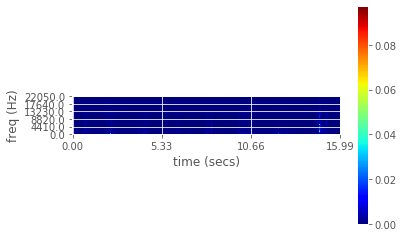

In [17]:
_ = ShortTermFeatures.spectrogram(x, Fs, window=200, step=1000, plot=True)

## Combining the work asbove into iterable functions

At a top level, iteratinging over the S3 bucket,
calling a function on each object that will create and store features into a database.
Need to include a file name as index or column, to allow a join later to labels csv

In [18]:
def feature_extract(obj):
    result = obj.get()['Body'].read()
    wrapper = BytesIO(result)
    wav_ = wavfile.read(wrapper)
    Fs, x = wav_[0], wav_[1]
    Mid_F, Short_F, mid_f_names = MidTermFeatures.mid_feature_extraction(signal=x,
                                                    sampling_rate=Fs, 
                                                    mid_window = 0.5*Fs,
                                                    mid_step = 0.25*Fs,
                                                    short_window = 0.050*Fs,
                                                    short_step = 0.025*Fs)
    return F, f_names

In [19]:
def process_s3(client, bucket_name):
    
    audio_mat = []
    features = []
    file_names = []
    #iterate 
    paginator = client.get_paginator('list_objects_v2')
    result = paginator.paginate(Bucket=bucket_name)
    for page in result:
        if "Contents" in page:
            for key in page[ "Contents" ][1:3]:
                keyString = key[ "Key" ]
                name = keyString.split('/')[-1]
                file_names.append(name)
                print (name)
                obj = s3_connection.Object(bucket_name, key=keyString)
                F, f_names = feature_extract(obj)
                audio_mat.append(F)
                if not features:
                    features = [f for f in f_names]
                
    return audio_mat, features, file_names

In [20]:

def call_s3(fname, folder='audio_train/'):
    path = folder + fname
    response = s3_client.get_object(Bucket=bucket_name, Key=path,)
    data = BytesIO(response['Body'].read())
    return data


def audio_vectorize(fname, data):
    try:
        y, sr = librosa.load(data, mono=True, duration=10, offset = .5)
    except:
        RuntimeError
        return pd.Series()
    
    chroma_stft = np.mean(librosa.feature.chroma_stft(y, sr))
    spec_cent = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    spec_bw = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
    zcr = np.mean(librosa.feature.zero_crossing_rate(y))
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    mfccs = np.mean(mfccs, axis=1)

    vector_dict = {'fname':fname, 'chroma_stft': chroma_stft, 'spectral_centroid': spec_cent, 'spectral_bandwidth': spec_bw,
                  'rolloff': rolloff, 'zero_crossing_rate': zcr}
    for i, mfcc in enumerate(mfccs):
        vector_dict['mfccs_{}'.format(i)] = mfcc
        
    return pd.Series(vector_dict)


def vector_merge(df, s3_folder = 'audio_train/', sample_size=200):

    vectors = []
    for i, fname in enumerate(df.loc[:sample_size-1, 'fname']):
        data = call_s3(fname, s3_folder)
        vec = audio_vectorize(fname, data)
        vectors.append(vec)

    vec_df = pd.concat(vectors, axis=1, sort=True).T
    df2 = pd.merge(df, vec_df, how='inner', on='fname')
    return df2


In [21]:
df = pd.read_csv('data/train_labels.csv').set_index('fname')
# dropping unneeded columns, corrupted files
df.drop(['license', 'freesound_id'], axis=1, inplace=True)
df.drop(['f76181c4.wav', '77b925c2.wav', '6a1f682a.wav', 'c7db12aa.wav', '7752cc8a.wav', '1d44b0bd.wav'], inplace=True)
df = df.reset_index()

In [22]:
s3_folder = 'audio_train/'
df2 = vector_merge(df, s3_folder, sample_size=10)
df2.to_csv('data/vectorized.csv')
os.system("say 'complete'")
df2.head()

,fname,labels,chroma_stft,mfccs_0,mfccs_1,mfccs_10,mfccs_11,mfccs_12,mfccs_13,mfccs_14,...,mfccs_4,mfccs_5,mfccs_6,mfccs_7,mfccs_8,mfccs_9,rolloff,spectral_bandwidth,spectral_centroid,zero_crossing_rate
0,ac9e7a91.wav,Church_bell,0.479215,-170.165,167.432,-2.06177,5.02693,-0.0490248,2.77039,-5.31401,...,-14.1341,10.5835,-7.56287,2.24012,-7.17547,1.27252,2485.71,1567.52,1328.24,0.0694039
1,65ae847e.wav,Frying_(food),0.58188,-152.376,-25.5767,-11.0795,-3.96279,1.83792,17.0349,0.900431,...,-14.3937,-4.35468,-12.1074,-0.230222,-10.5919,-0.697682,8190.99,2731.86,4837.44,0.393471
2,32ec2454.wav,Computer_keyboard,0.594318,-430.112,72.5648,0.556227,10.302,6.11609,11.2804,2.38242,...,7.4037,20.4823,19.3272,14.7153,8.23909,13.4073,4712.47,2468.61,2206.95,0.0469883
3,af7b5bab.wav,Scissors,0.358634,-565.965,119.06,3.2161,7.39139,5.46725,5.94876,2.3375,...,25.3669,18.1197,11.444,8.11706,7.38402,4.84068,1867.34,1994.75,1065.59,0.0252966
4,7e8cd849.wav,Purr,0.480252,-277.49,129.397,-9.61587,6.5952,-6.41837,5.10352,2.18188,...,-6.61171,22.0316,9.36739,2.58381,-11.8354,-6.04771,3717.12,2311.8,1705.57,0.0729424


In [24]:
len(df[df['labels'] == 'Purr'])

52